In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt

In [3]:
emotions =load_dataset("emotion", download_mode="force_redownload")

/opt/conda/lib/python3.10/site-packages/datasets/load.py:1429: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [4]:
emotions["train"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [5]:
train_ds=emotions["train"]

In [6]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
train_ds[1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

In [8]:
import pandas as pd

In [9]:
emotions.set_format(type="pandas")
df=emotions["train"][:]

In [10]:
df.head(5)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [11]:
def label_int2str(row,split):
    return emotions[split].features["label"].int2str(row)

In [88]:
df["label_name"]=df["label"].apply(label_int2str,split="train")
df.head(5)
labels=list(df["label_name"].unique())
labels

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

<Axes: xlabel='label_name'>

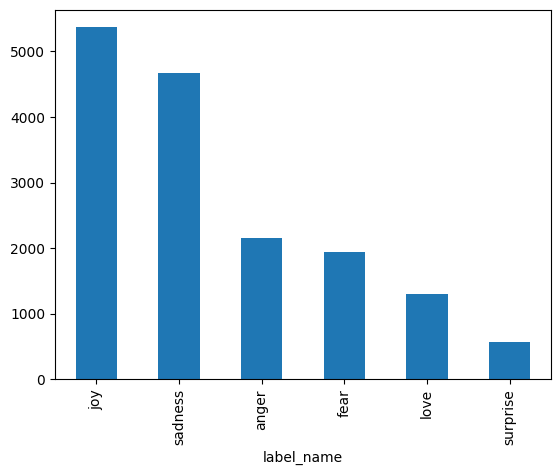

In [13]:
df["label_name"].value_counts().plot.bar()

<Axes: title={'center': 'Words per Tweet '}, xlabel='label_name'>

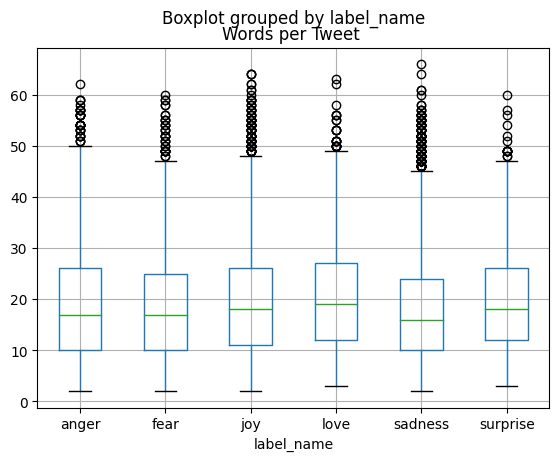

In [14]:
df["Words per Tweet "]=df["text"].str.split().apply(len)
df.boxplot("Words per Tweet ",by="label_name")

In [15]:
from transformers import AutoTokenizer
model_name="distilbert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [16]:
import torch

In [17]:
text="This is a text"

In [18]:
from transformers import AutoModel
text_tensor=tokenizer.encode(text,return_tensors="pt")
model=AutoModel.from_pretrained(model_name)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [19]:
def tokenize(batch):
    return tokenizer(batch["text"],padding=True,truncation=True)

In [20]:
emotions.reset_format()

In [33]:
emotions["train"][1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

In [22]:
emotions_encoded=emotions.map(tokenize,batched=True,batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [36]:
emotions_encoded["train"][1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0,
 'input_ids': [101,
  1045,
  2064,
  2175,
  2013,
  3110,
  2061,
  20625,
  2000,
  2061,
  9636,
  17772,
  2074,
  2013,
  2108,
  2105,
  2619,
  2040,
  14977,
  1998,
  2003,
  8300,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [24]:
import numpy as np

In [54]:
import numpy as np
def forward_pass(batch):
    input_ids = torch.tensor(batch["input_ids"])
    attention_mask = torch.tensor(batch["attention_mask"])
    with torch.no_grad():
        last_hidden_state = model(input_ids, attention_mask).last_hidden_state
        last_hidden_state = last_hidden_state.numpy()
 # Use average of unmasked hidden states for classification
    lhs_shape = last_hidden_state.shape
    boolean_mask = ~np.array(batch["attention_mask"]).astype(bool)
    boolean_mask = np.repeat(boolean_mask, lhs_shape[-1], axis=-1)
    boolean_mask = boolean_mask.reshape(lhs_shape)
    
    masked_mean = np.ma.array(last_hidden_state, mask=boolean_mask).mean(axis=1)
    
    batch["hidden_state"] = masked_mean.data
    return batch


In [55]:
emotions_encoded = emotions_encoded.map(forward_pass, batched=True,
 batch_size=16)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [56]:
emotions_encoded["train"].features


{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'hidden_state': Sequence(feature=Value(dtype='float64', id=None), length=-1, id=None)}

In [58]:
import numpy as np

In [59]:
X_train=np.array(emotions_encoded["train"]["hidden_state"])

In [60]:
X_valid=np.array(emotions_encoded["validation"]["hidden_state"])

In [61]:
y_train=np.array(emotions_encoded["train"]["label"])

In [62]:
y_valid=np.array(emotions_encoded["validation"]["label"])

In [64]:
X_train.shape

(16000, 768)

In [65]:
X_valid.shape

(2000, 768)

In [66]:
from umap import UMAP

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
X_scaled=MinMaxScaler().fit_transform(X_train)

In [70]:
mapper=UMAP(n_components=2,metric="cosine").fit(X_scaled)

In [73]:
df_emb=pd.DataFrame(mapper.embedding_,columns=['X','Y'])

In [151]:
df_emb['label'] = y_train


In [152]:
df_emb.head(5)

,X,Y,label
0,6.209785,4.463568,0
1,1.196980,4.565890,0
2,5.279878,1.690196,3
3,2.060190,3.261442,2
4,0.738943,6.994490,3


# PLOTTING LABEL WISE TO SEE SIMILARITIES/DIFFERENCES BETWEEN TENSOR VECTOR OF DIFFERENT LABELS.

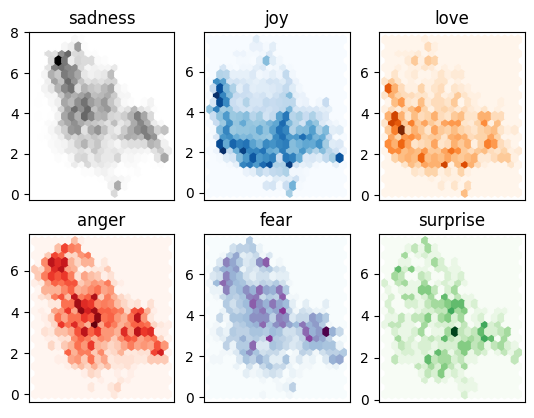

In [104]:
fig,axes=plt.subplots(2,3)
axes=axes.flatten()
labels=["sadness","joy","love","anger","fear","surprise"]
cmaps=["Greys","Blues","Oranges","Reds","BuPu","Greens"]
for i,(label,cmap) in enumerate(zip(labels,cmaps)):
    df_emb_sub=df_emb.query(f"label=={i}")
    axes[i].hexbin(df_emb_sub["X"],df_emb_sub["Y"],cmap=cmap,gridsize=20)
    axes[i].set_title(label)
    axes[i].set_xticks([])


# PERFORMING BASIC PREDICTIONS USING LOGISTIC REGRESSIONS (SKLEARN)

In [119]:
import numpy as np
from sklearn.linear_model import LogisticRegression
np.__version__

'1.24.3'

In [114]:
lr=LogisticRegression(n_jobs=-1,penalty=None)

In [115]:
lr.fit(X_train,y_train)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

LogisticRegression(n_jobs=-1, penalty=None)

In [121]:
lr.score(X_valid,y_valid)  #PRINTS ACCURACY ON VALIDATION DATA

0.6525

# USING DUMMY CLASSIFIER (SKLEARN) TO COMPARE RESULT WITH LOGISTIC REGRESSION ACCURACY

In [123]:
from sklearn.dummy import DummyClassifier

In [164]:
dum=DummyClassifier(strategy="uniform")

In [165]:
dum.fit(X_train,y_train)

DummyClassifier(strategy='uniform')

In [166]:
dum.score(X_valid,y_valid) #ACCURACY OF DUMMY CLASSIFIER

0.161

# DUMMY CLASSIFIER ACCURACY IS 35.2% AND THAT OF LOGISTIC REGRESSION IS 65.25%

In [167]:
y_preds=dum.predict(X_valid)

In [168]:
len(y_preds)

2000

In [169]:
print(classification_report(y_valid, y_preds, target_names=labels))

              precision    recall  f1-score   support

     sadness       0.30      0.18      0.23       550
         joy       0.39      0.17      0.24       704
        love       0.10      0.19      0.13       178
       anger       0.11      0.14      0.12       275
        fear       0.15      0.21      0.17       212
    surprise       0.03      0.15      0.06        81

    accuracy                           0.18      2000
   macro avg       0.18      0.17      0.16      2000
weighted avg       0.26      0.18      0.20      2000

